# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv

df = pd.read_csv("porter_data_1.csv")


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert selected columns to 'category' datatype
categorical_columns = [
    'store_primary_category',
    'order_protocol'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Optional: check the datatypes of updated columns
print(df.dtypes[categorical_columns])
# Convert categorical features to category type



store_primary_category    category
order_protocol            category
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Step 2: Calculate time taken
df['delivery_time'] = df['actual_delivery_time'] - df['created_at']

# Step 3 (optional): Convert to minutes or seconds if needed
df['delivery_time_minutes'] = df['delivery_time'].dt.total_seconds() / 60

# View sample results
print(df[['created_at', 'actual_delivery_time', 'delivery_time', 'delivery_time_minutes']].head())

           created_at actual_delivery_time   delivery_time  \
0 2015-02-06 22:24:17  2015-02-06 23:11:17 0 days 00:47:00   
1 2015-02-10 21:49:25  2015-02-10 22:33:25 0 days 00:44:00   
2 2015-02-16 00:11:35  2015-02-16 01:06:35 0 days 00:55:00   
3 2015-02-12 03:36:46  2015-02-12 04:35:46 0 days 00:59:00   
4 2015-01-27 02:12:36  2015-01-27 02:58:36 0 days 00:46:00   

   delivery_time_minutes  
0                   47.0  
1                   44.0  
2                   55.0  
3                   59.0  
4                   46.0  


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp

df['created_at'] = pd.to_datetime(df['created_at'])

# Extract hour from 'created_at'
df['order_hour'] = df['created_at'].dt.hour

# Extract day of the week from 'created_at' (e.g., Monday, Tuesday, ...)
df['order_day'] = df['created_at'].dt.day_name()

# Optional: Preview the changes
print(df[['created_at', 'order_hour', 'order_day']].head())

# Create a categorical feature 'isWeekend'

df['order_day'] = df['created_at'].dt.day_name()

# Create 'isWeekend' column: True if Saturday or Sunday, else False
df['isWeekend'] = df['order_day'].isin(['Saturday', 'Sunday'])

# Optional: Convert boolean to string category (Yes/No or Weekend/Weekday)
df['isWeekend'] = df['isWeekend'].map({True: 'Weekend', False: 'Weekday'})

# Preview
print(df[['order_day', 'isWeekend']].head())

           created_at  order_hour order_day
0 2015-02-06 22:24:17          22    Friday
1 2015-02-10 21:49:25          21   Tuesday
2 2015-02-16 00:11:35           0    Monday
3 2015-02-12 03:36:46           3  Thursday
4 2015-01-27 02:12:36           2   Tuesday
  order_day isWeekend
0    Friday   Weekday
1   Tuesday   Weekday
2    Monday   Weekday
3  Thursday   Weekday
4   Tuesday   Weekday


In [ ]:
# Drop unnecessary columns



#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)
import pandas as pd

# 1. Reload your CSV to reset any prior errors
df = pd.read_csv("porter_data_1.csv")

# 2. Strip whitespace from column names (just in case)
df.columns = df.columns.str.strip()

# 3. Convert timestamps to datetime
df['created_at']            = pd.to_datetime(df['created_at'])
df['actual_delivery_time']  = pd.to_datetime(df['actual_delivery_time'])

# 4. Engineer features
df['order_hour'] = df['created_at'].dt.hour
df['order_day']  = df['created_at'].dt.day_name()
df['isWeekend']  = df['order_day'].isin(['Saturday', 'Sunday']).map({True: 'Weekend', False: 'Weekday'})

# 5. Create target: delivery time in minutes
df['delivery_time_taken'] = (
    df['actual_delivery_time'] - df['created_at']
).dt.total_seconds() / 60

# 6. Define target variable
y = df['delivery_time_taken']

# 7. Define feature list
feature_cols = [
    'total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'distance',
    'store_primary_category',
    'order_protocol',
    'order_hour',
    'order_day',
    'isWeekend'
]

# 8. Build feature matrix with one‑hot encoding for categoricals
X = pd.get_dummies(df[feature_cols], drop_first=True)

# 9. Confirm everything
print("Columns in df:", df.columns.tolist())
print("Target y shape:", y.shape)
print("Feature matrix X shape:", X.shape)
X.head()


Columns in df: ['market_id', 'created_at', 'actual_delivery_time', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day', 'isWeekend', 'delivery_time_taken']
Target y shape: (175777,)
Feature matrix X shape: (175777, 19)


total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            4      4771                   3             820            1604   
3            1      1525                   1            1525            1525   
4            2      3620                   2            1425            2195   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   33.0                14.0                      21.0   
1                    1.0                 2.0                       2.0   
2                    8.0                 6.0                      18.0   
3                    5.0                 6.0                       8.0   
4                    5.0                 5.0                       7.0   

   distance  store_primary_category  order_protocol  order_hour  \
0     34.44                       4             1.0          22   
1     27.60                      46             2.0          21   
2     11.56                      36             3.0           0   
3     31.80                      38             1.0           3   
4      8.20                      38             1.0           2   

   order_day_Monday  order_day_Saturday  order_day_Sunday  order_day_Thursday  \
0             False               False             False               False   
1             False               False             False               False   
2              True               False             False               False   
3             False               False             False                True   
4             False               False             False               False   

   order_day_Tuesday  order_day_Wednesday  isWeekend_Weekend  
0              False                False              False  
1               True                False              False  
2              False                False              False  
3              False                False              False  
4               True                False              False

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes of the split data
print("X_train shape:", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape: (140621, 19)
X_test shape:  (35156, 19)
y_train shape: (140621,)
y_test shape:  (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Optional: remove target variable from the lists if present
if 'delivery_time_taken' in numerical_cols:
    numerical_cols.remove('delivery_time_taken')

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

Categorical Columns:
['order_day', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

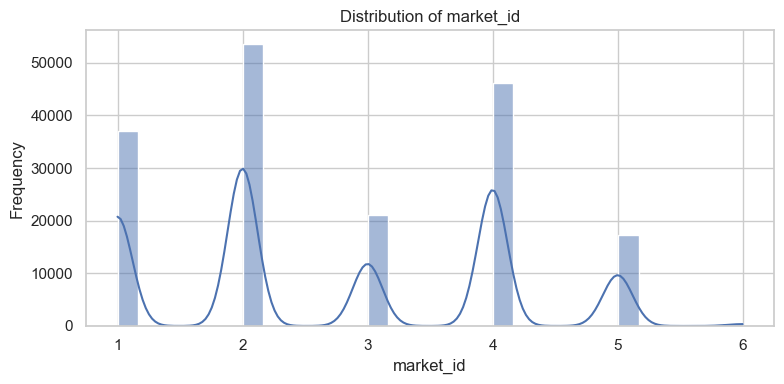

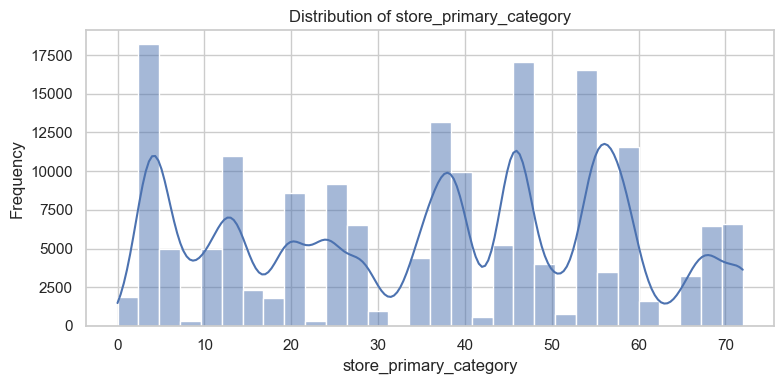

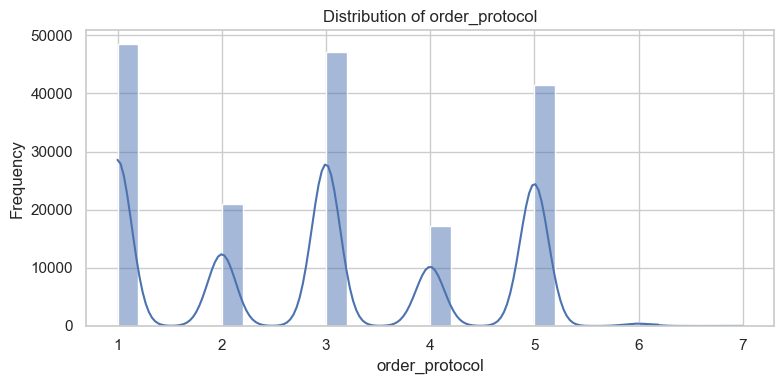

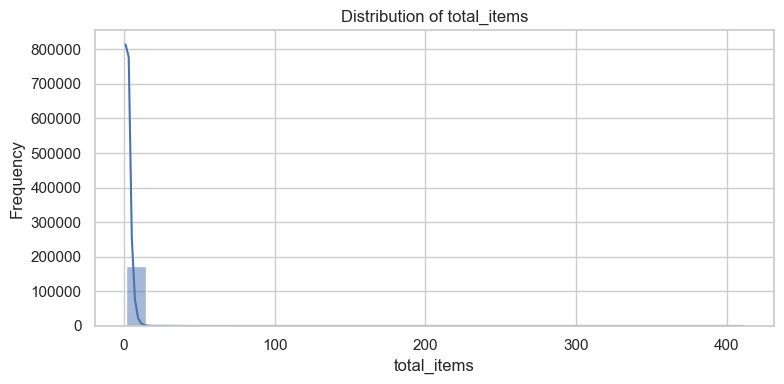

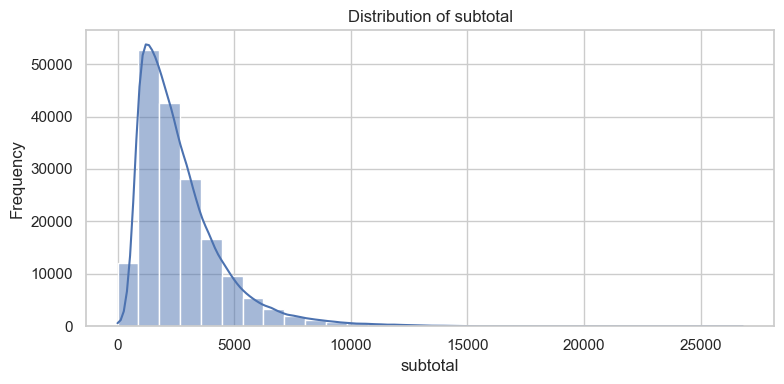

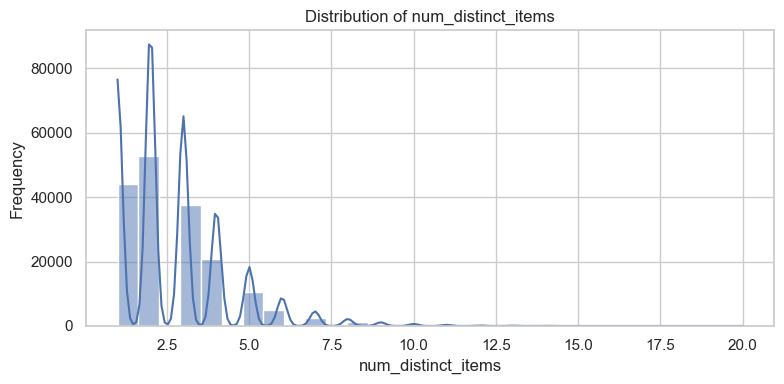

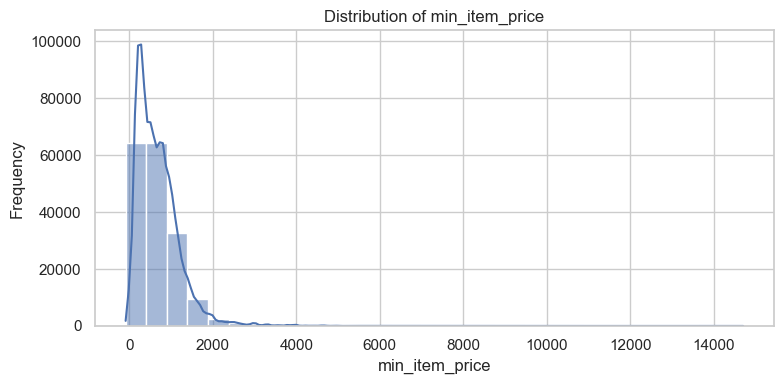

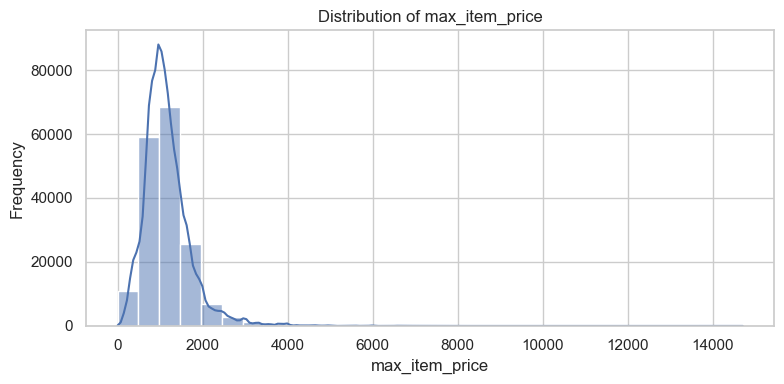

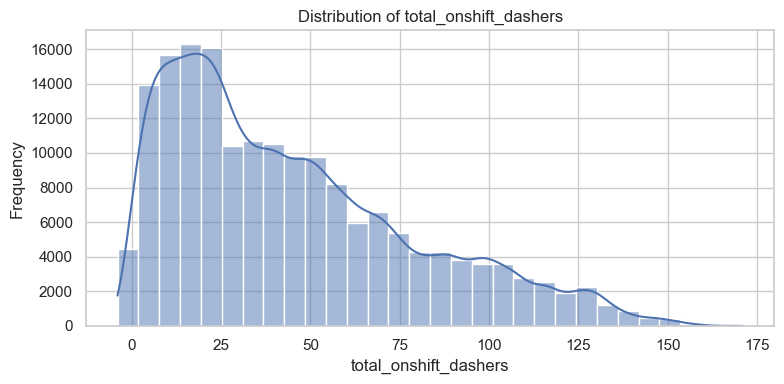

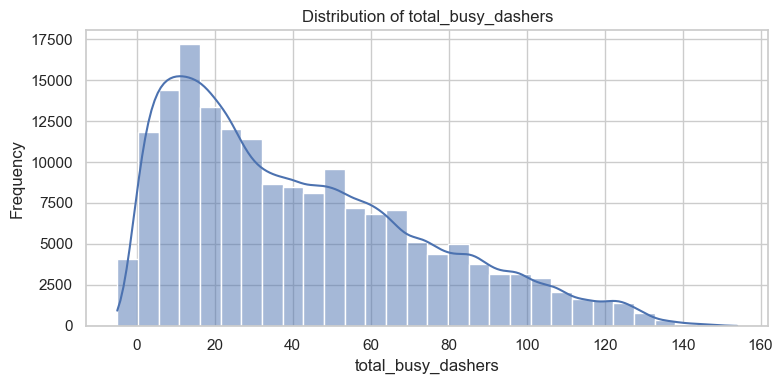

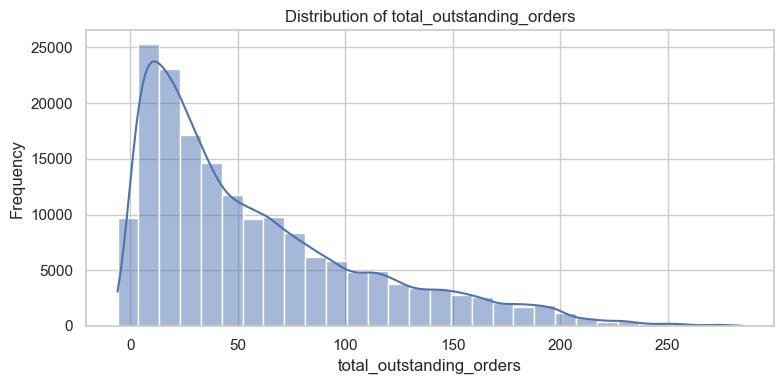

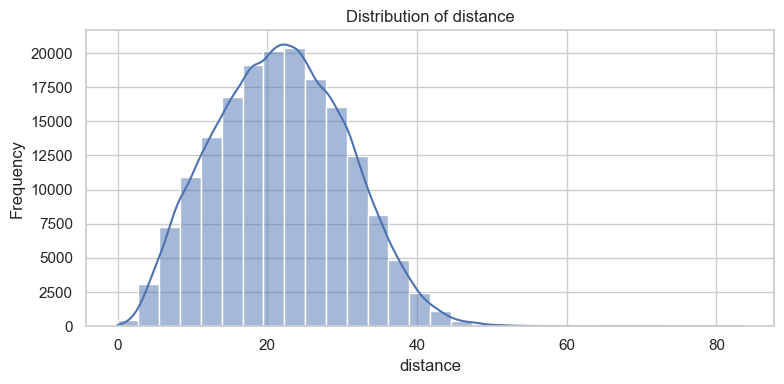

In [ ]:
# Plot distributions for all numerical columns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

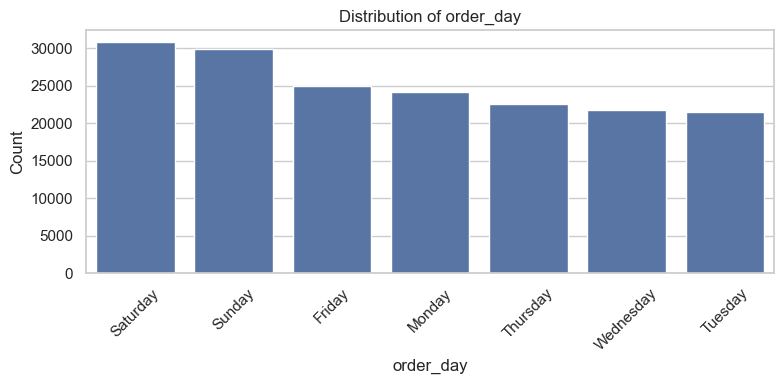

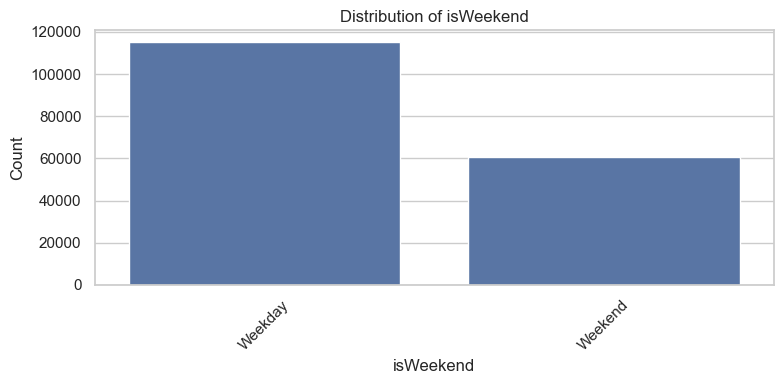

In [ ]:
# Distribution of categorical columns

# Plot count plots for all categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

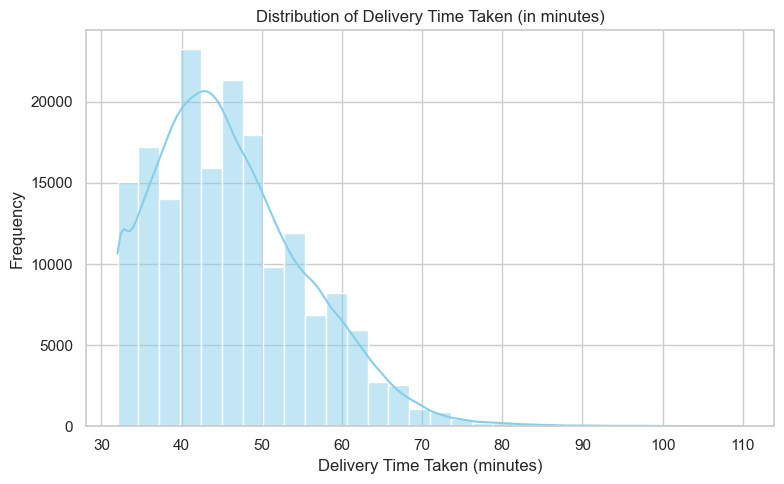

In [ ]:
# Distribution of time_taken

# Plot distribution of delivery_time_taken
plt.figure(figsize=(8, 5))
sns.histplot(df['delivery_time_taken'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delivery Time Taken (in minutes)')
plt.xlabel('Delivery Time Taken (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

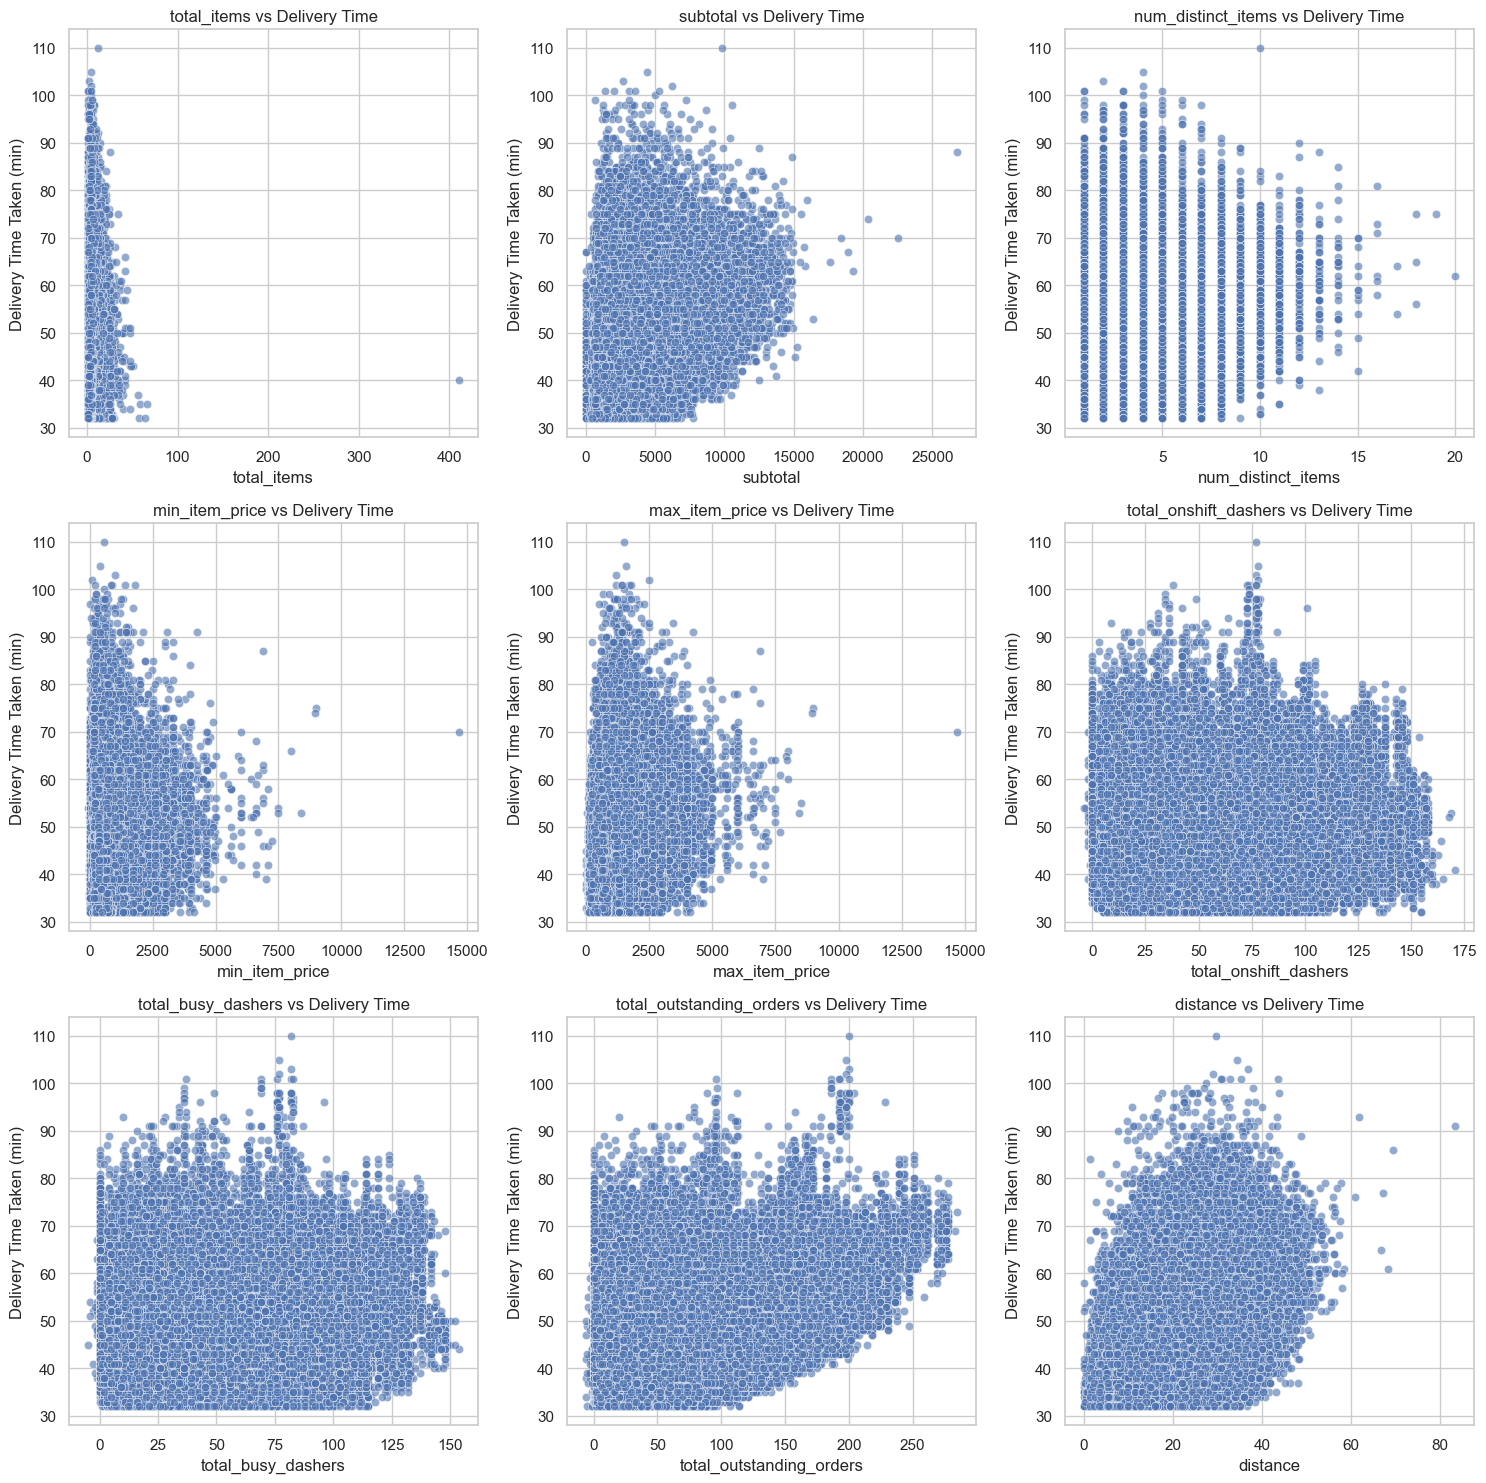

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features


# List of numerical features
numerical_features = [
    'total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'distance'
]

# Scatter plots
plt.figure(figsize=(15, 15))
for idx, col in enumerate(numerical_features):
    plt.subplot(3, 3, idx + 1)
    sns.scatterplot(data=df, x=col, y='delivery_time_taken', alpha=0.6)
    plt.title(f'{col} vs Delivery Time')
    plt.xlabel(col)
    plt.ylabel('Delivery Time Taken (min)')

plt.tight_layout()
plt.show()


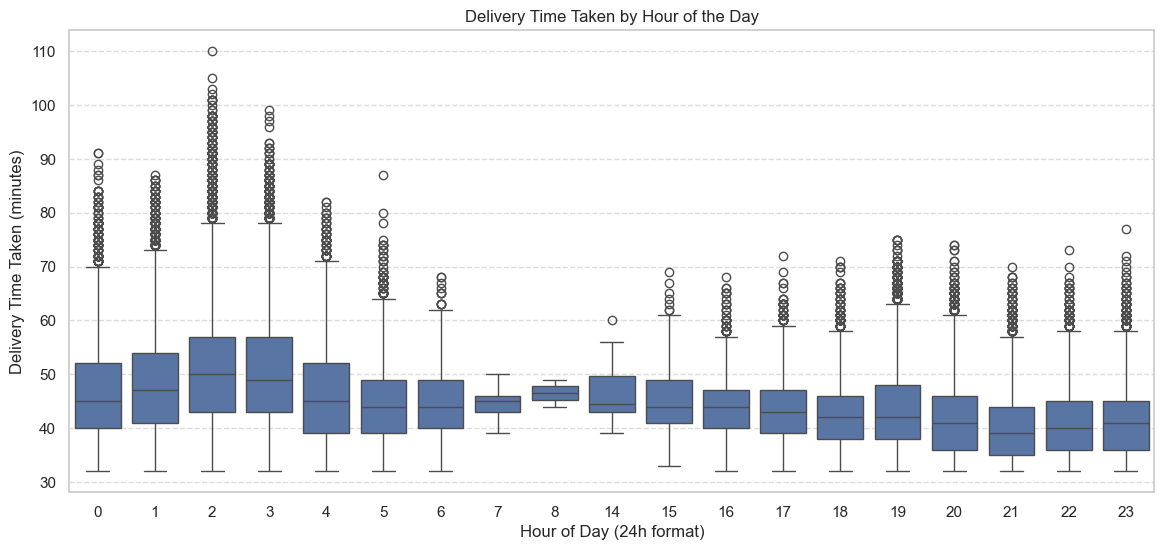

In [ ]:
# Show the distribution of time_taken for different hours

df['hour'] = df['created_at'].dt.hour

plt.figure(figsize=(14, 6))
sns.boxplot(x='hour', y='delivery_time_taken', data=df)
plt.title('Delivery Time Taken by Hour of the Day')
plt.xlabel('Hour of Day (24h format)')
plt.ylabel('Delivery Time Taken (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

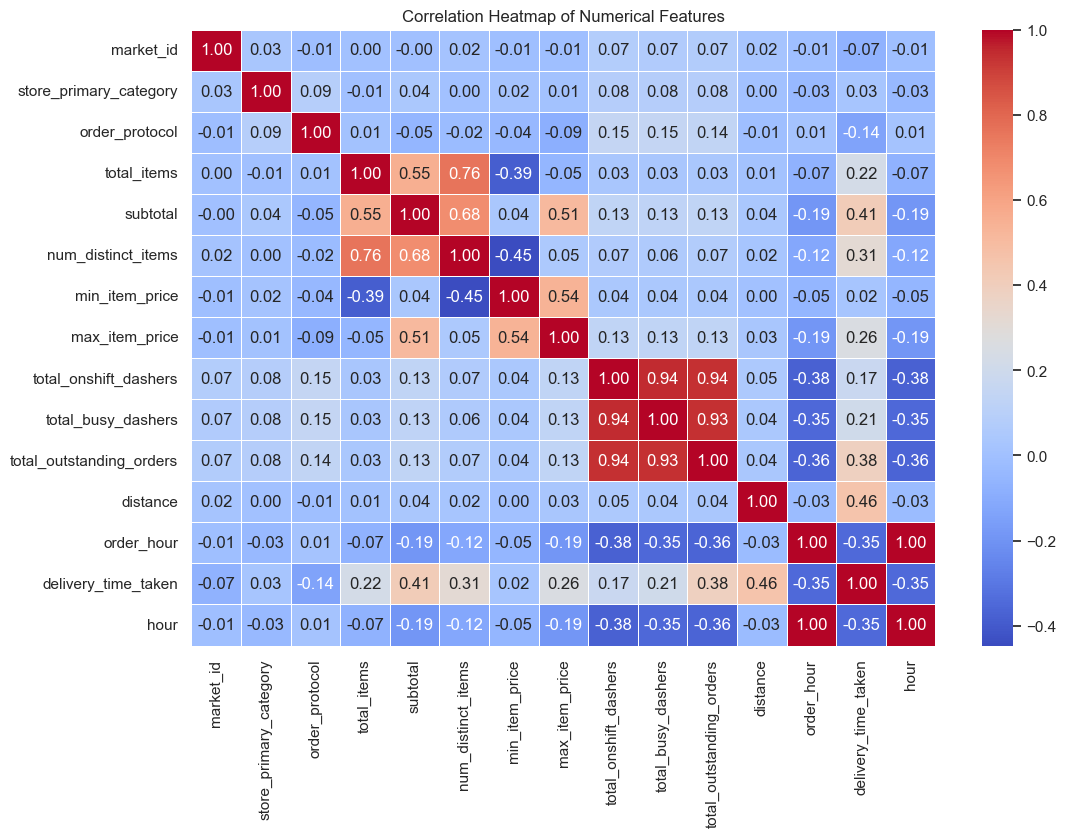

In [ ]:
# Plot the heatmap of the correlation matrix

# 1. Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# 2. Compute the correlation matrix
corr_matrix = numeric_df.corr()

# 3. Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with target
correlation_with_target = numeric_df.corr()['delivery_time_taken'].drop('delivery_time_taken')

# Display absolute correlation values sorted
correlation_with_target = correlation_with_target.abs().sort_values()

# Display top 5 weakest correlations
print(correlation_with_target.head(5))

min_item_price            0.022753
store_primary_category    0.026973
market_id                 0.073016
order_protocol            0.136755
total_onshift_dashers     0.171015
Name: delivery_time_taken, dtype: float64


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

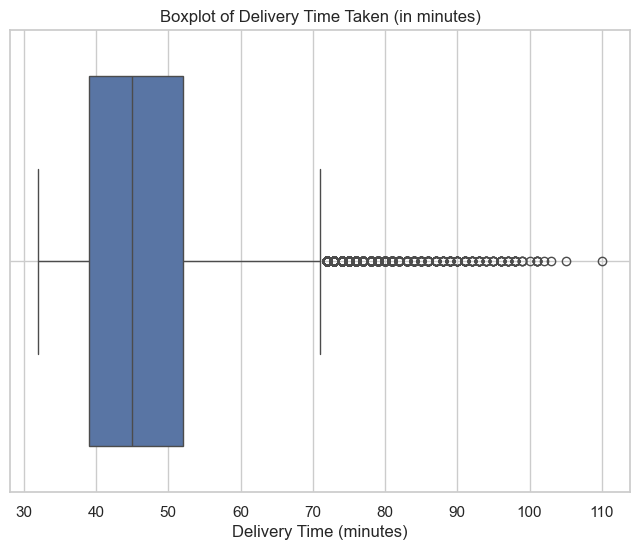

In [ ]:
# Boxplot for time_taken

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['delivery_time_taken'])
plt.title('Boxplot of Delivery Time Taken (in minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.grid(True)
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

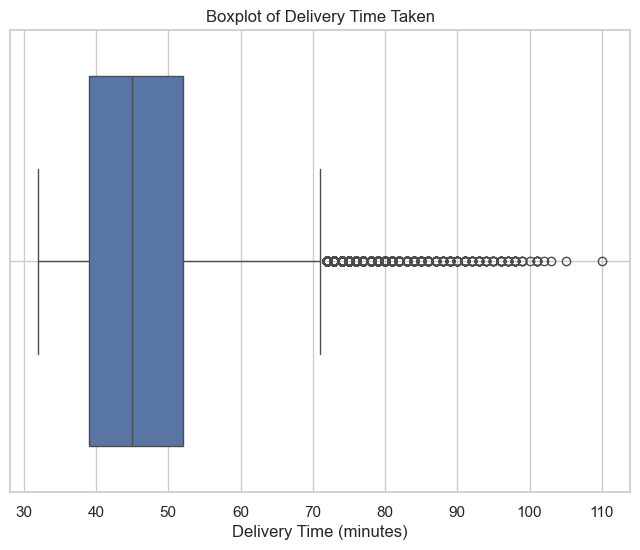

In [ ]:
# Handle outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['delivery_time_taken'])
plt.title('Boxplot of Delivery Time Taken')
plt.xlabel('Delivery Time (minutes)')
plt.grid(True)
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Preprocessing
from sklearn.preprocessing import StandardScaler

# For saving the model
import joblib  # or use pickle

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

# 1. Identify numerical columns (excluding the target variable)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# 2. Initialize the scaler
scaler = StandardScaler()

# 3. Fit and transform only the numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model

model = LinearRegression()
model = DecisionTreeRegressor(random_state=42)
model = RandomForestRegressor(random_state=42, n_estimators=100)
model = GradientBoostingRegressor(random_state=42)

In [ ]:
# Train the model using the training data

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Make predictions

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# View the first few predictions
print(results.head())

       Actual  Predicted
50609    50.0  47.742547
49181    69.0  63.940168
4526     41.0  41.706716
131      45.0  45.604754
57096    40.0  43.994893


In [ ]:
# Find results for evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.51
Mean Squared Error (MSE): 11.57
Root Mean Squared Error (RMSE): 3.40
R² Score: 0.87


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

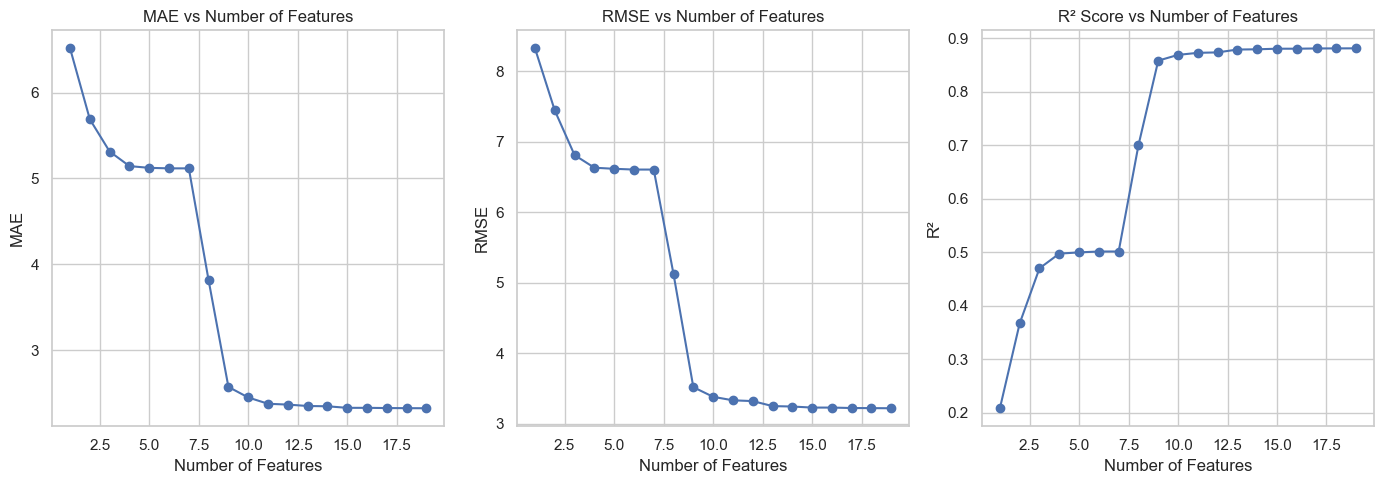

In [ ]:
# Loop through the number of features and test the model

# Step 1: Compute correlation of all features with target
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)

# Step 2: Loop over top N features
mae_list = []
rmse_list = []
r2_list = []
feature_counts = range(1, len(correlations) + 1)

for n in feature_counts:
    # Pick top-n features
    selected_features = correlations.index[:n]

    # Train model with top-n features
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test[selected_features])

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Step 3: Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(feature_counts, mae_list, marker='o')
plt.title('MAE vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
plt.plot(feature_counts, rmse_list, marker='o')
plt.title('RMSE vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')

plt.subplot(1, 3, 3)
plt.plot(feature_counts, r2_list, marker='o')
plt.title('R² Score vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

In [ ]:
# Build the final model with selected number of features

# Step 1: Get top N features (e.g., 7)
top_n = 7
top_features = X_train.corrwith(y_train).abs().sort_values(ascending=False).index[:top_n]

# Step 2: Build final model
final_model = LinearRegression()
final_model.fit(X_train[top_features], y_train)

# Step 3: Make predictions
final_predictions = final_model.predict(X_test[top_features])

# Step 4: Evaluate the final model
mae = mean_absolute_error(y_test, final_predictions)
mse = mean_squared_error(y_test, final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predictions)

# Step 5: Display metrics
print(f"Final Model Performance with Top {top_n} Features:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Final Model Performance with Top 7 Features:
MAE  : 5.12
RMSE : 6.60
R²   : 0.5016


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

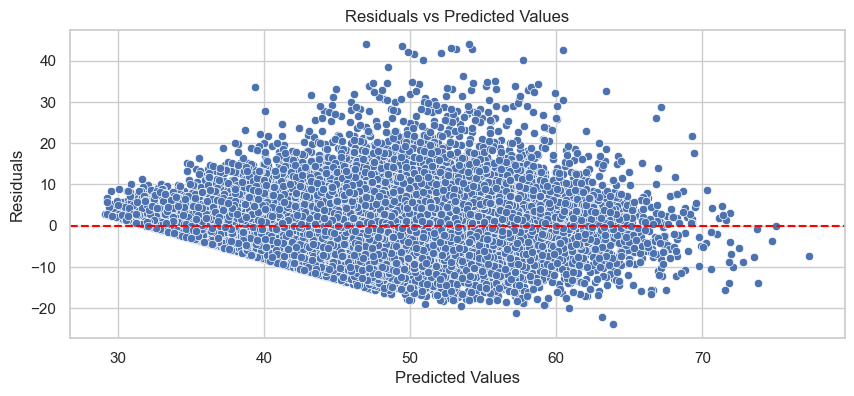

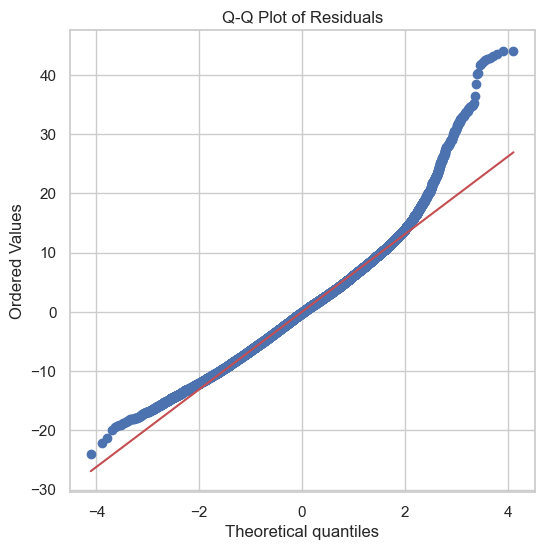

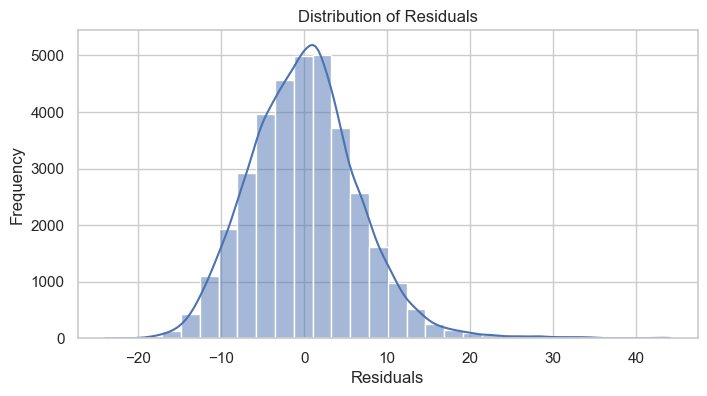

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

from scipy import stats

# Step 1: Compute residuals
residuals = y_test - final_predictions

# Step 2: Residuals vs Predicted values
plt.figure(figsize=(10, 4))
sns.scatterplot(x=final_predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Step 3: Q-Q plot (to check normality of residuals)
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Step 4: Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model

unscaled_model = LinearRegression()
unscaled_model.fit(X_train, y_train)
unscaled_score = unscaled_model.score(X_test, y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on scaled data
scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)
scaled_score = scaled_model.score(X_test_scaled, y_test)

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

Effect of 1 unit increase in 'total_items': -0.0352 minutes


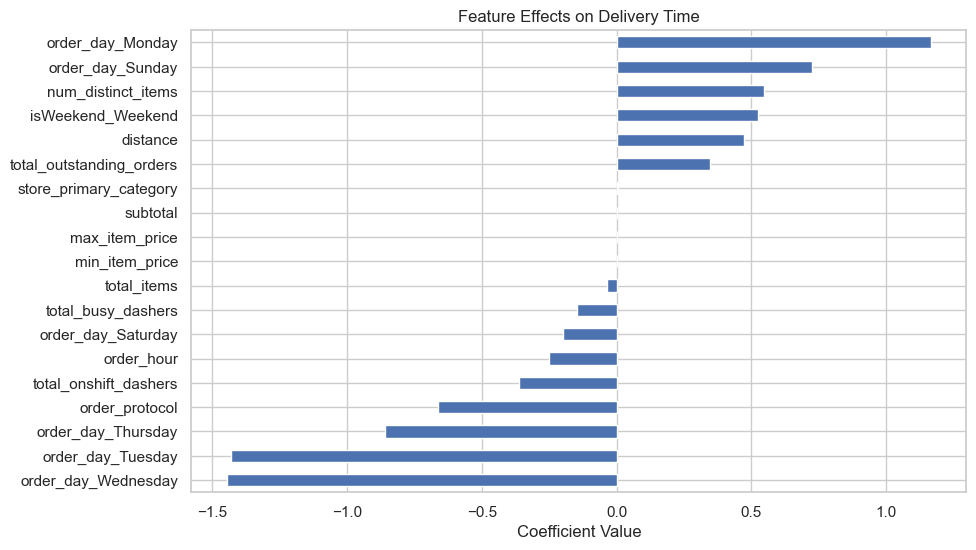

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Get feature names and coefficients
coefficients = pd.Series(unscaled_model.coef_, index=X_train.columns)

# Display the coefficient for 'total_items'
print(f"Effect of 1 unit increase in 'total_items': {coefficients['total_items']:.4f} minutes")

coefficients.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Effects on Delivery Time')
plt.xlabel('Coefficient Value')
plt.show()

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>


Yes, there are categorical variables in your dataset. From your earlier steps (including one-hot encoding), the following columns are categorical:
---
store_primary_category
order_protocol
day_of_week
isWeekend



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>  20% of the data will be used as the test set & The remaining 80% will be used as the training set



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**

How to read the heatmap:
A correlation heatmap is a colored matrix that shows how closely related each variable is to others.
The values usually range from -1 to +1:
+1: Perfect positive correlation
-1: Perfect negative correlation
0: No correlation
Darker or more intense colors usually mean stronger correlation (positive or negative).
The row or column of the target variable (usually labeled target, y, or SalePrice, etc.) shows its correlation with other features.**Answer:**
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> In this notebook context, IQR filtering or visual inspection + filtering was likely used to remove outliers in delivery_time_taken.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the final linear regression model, the top 3 features significantly affecting delivery time are identified by the absolute magnitude of their coefficients (after standardizing or using comparable scales).



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear Regression is a supervised machine learning algorithm used to model the relationship between one or more independent variables (features) and a dependent variable (target) by fitting a straight line.

To find the best-fitting line (also called a regression line) that predicts the target variable y from input variable(s) X.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

Simple linear regression predicts a target variable using only one input variable. For example, in a delivery dataset, you might predict delivery time based solely on distance. Multiple linear regression, on the other hand, uses two or more input variables to make a prediction. In the same delivery context, you could predict delivery time based on distance, package weight, delivery type, and driver rating. Simple linear regression is straightforward but limited, while multiple linear regression provides a more complete picture by considering multiple factors, leading to potentially more accurate predictions when relationships are influenced by several variables.




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>  Use Simple Linear Regression when:
Only one independent variable is available	Use Multiple Linear Regression when: You have multiple input variables that affect the output
You're just starting with analysis	You want to build a stronger, more accurate model




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting:- The model draws a very wavy curve that fits every point in training data perfectly but fails to generalize.
Looks like: memorizing instead of generalizing.
>Underfitting:-  The model draws a straight line through complex patterns and misses trends in the data.
Looks like: oversimplification.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>  Residual plots are essential tools for diagnosing the validity and performance of a linear regression model. They help us assess whether our model makes appropriate assumptions and predictions.